In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
def get_full_df(file_names, years, data_path, column_names):
    dfs = []
    i = 0
    for file in file_names:
        df = pd.read_csv(data_path + file, index_col= None, usecols= column_names, low_memory= False, encoding='utf-8')
        df['year'] = years[i]
        i += 1
        dfs.append(df)

    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

def select_colleges(df, college_list):
    dfs = []
    for college in college_list:
        dfs.append(df.loc[df['INSTNM'] == college])
    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

def state_group_avg(df, col):
    s_avg_pov = {state: df.loc[df['STABBR'] == state][col].mean() for state in df['STABBR'].unique()}
    pov_r = []
    for index, row in df.iterrows():
        if math.isnan(row[col]):
            pov_r.append(s_avg_pov[row['STABBR']])
        else:
            pov_r.append(row[col])
    return pov_r

data_path = '/mnt/d/Downloads/CollegeScorecard_Raw_Data_01192021/Raw Data Files/'

merged_file_names = ['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 
                     'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 
                     'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 
                     'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 
                     'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv']
merged_years = list(range(1996, 2019))
merged_cols = pd.read_csv(data_path + 'MERGED1996_97_PP.csv', index_col=0, nrows=0).columns.tolist()

field_file_names = ['FieldOfStudyData1415_1516_PP.csv', 'FieldOfStudyData1516_1617_PP.csv', 'Most-Recent-Cohorts-Field-of-Study.csv']
field_years = list(range(2016, 2019))
field_cols = pd.read_csv(data_path + 'FieldOfStudyData1415_1516_PP.csv', index_col=0, nrows=0).columns.tolist()

price_file_names = ['MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 
                    'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 
                    'MERGED2017_18_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv']
price_years = list(range(2009, 2019))

base_cols = ['UNITID', 'OPEID6', 'INSTNM']
colleges = ["University of Colorado Boulder", "University of San Diego", "University of California-Los Angeles", "New York University", "The University of Texas at Austin"]

In [3]:
save_cols = ['MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 
             'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 
             'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 
             'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 
             'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'DISTANCEONLY', 
             'UGDS', 'TUITFTE', 'INEXPFTE', 'PCTPELL', 'COSTT4_A', 
             'COSTT4_P', 'C150_4', 'C150_L4', 'PCTFLOAN', 'AGE_ENTRY', 
             'VETERAN', 'FIRST_GEN', 'POVERTY_RATE', 'UNEMP_RATE', 'STABBR',
             'OPENADMP', 'LPSTAFFORD_CNT', 'LPSTAFFORD_AMT', 'LPPPLUS_CNT', 'LPPPLUS_AMT' ]

df = pd.read_csv(data_path + 'Most-Recent-Cohorts-All-Data-Elements.csv', index_col= None, usecols= save_cols, low_memory= False)

In [4]:
df.replace('PrivacySuppressed', np.nan, inplace=True)

In [5]:
st = df['STABBR']
df = df.drop('STABBR', axis=1)
for i in df.columns: #to_numeric not working
    try:
        df[i] = df[i].astype(float)
    except:
        pass
df['STABBR'] = st

In [6]:
df.dtypes[df.dtypes == 'object']

STABBR    object
dtype: object

In [7]:
df['avg_cost'] = df['COSTT4_A'].replace(np.nan, 0) + df['COSTT4_P'].replace(np.nan, 0)
df = df.drop(['COSTT4_A', 'COSTT4_P'], axis=1)
df['completion_rate'] = df['C150_4'].replace(np.nan, 0) + df['C150_L4'].replace(np.nan, 0)
df = df.drop(['C150_4', 'C150_L4'], axis=1)

In [8]:
df = df.loc[df['PCIP01'].notna()]

In [9]:
for col in df.columns:
    if df[col].isna().sum():
        df[col] = state_group_avg(df, col)

for col in df.columns:
    print(col, df[col].isna().sum())

MAIN 0
NUMBRANCH 0
PREDDEG 0
HIGHDEG 0
PCIP01 0
PCIP03 0
PCIP04 0
PCIP05 0
PCIP09 0
PCIP10 0
PCIP11 0
PCIP12 0
PCIP13 0
PCIP14 0
PCIP15 0
PCIP16 0
PCIP19 0
PCIP22 0
PCIP23 0
PCIP24 0
PCIP25 0
PCIP26 0
PCIP27 0
PCIP29 0
PCIP30 0
PCIP31 0
PCIP38 0
PCIP39 0
PCIP40 0
PCIP41 0
PCIP42 0
PCIP43 0
PCIP44 0
PCIP45 0
PCIP46 0
PCIP47 0
PCIP48 0
PCIP49 0
PCIP50 0
PCIP51 0
PCIP52 0
PCIP54 0
DISTANCEONLY 0
UGDS 0
TUITFTE 0
INEXPFTE 0
PCTPELL 0
PCTFLOAN 0
AGE_ENTRY 0
VETERAN 6
FIRST_GEN 0
POVERTY_RATE 2
UNEMP_RATE 2
OPENADMP 0
LPSTAFFORD_CNT 5
LPSTAFFORD_AMT 5
LPPPLUS_CNT 5
LPPPLUS_AMT 5
STABBR 0
avg_cost 0
completion_rate 0


In [10]:
df.dropna(inplace=True)

In [11]:
df['avg_stafford'] = df['LPSTAFFORD_AMT'] / df['LPSTAFFORD_CNT']
df['avg_plus'] = df['LPPPLUS_AMT'] / df['LPPPLUS_CNT']
df = df.drop(['LPSTAFFORD_AMT', 'LPSTAFFORD_CNT', 'LPPPLUS_AMT', 'LPPPLUS_CNT', 'STABBR'], axis=1)

<AxesSubplot:>

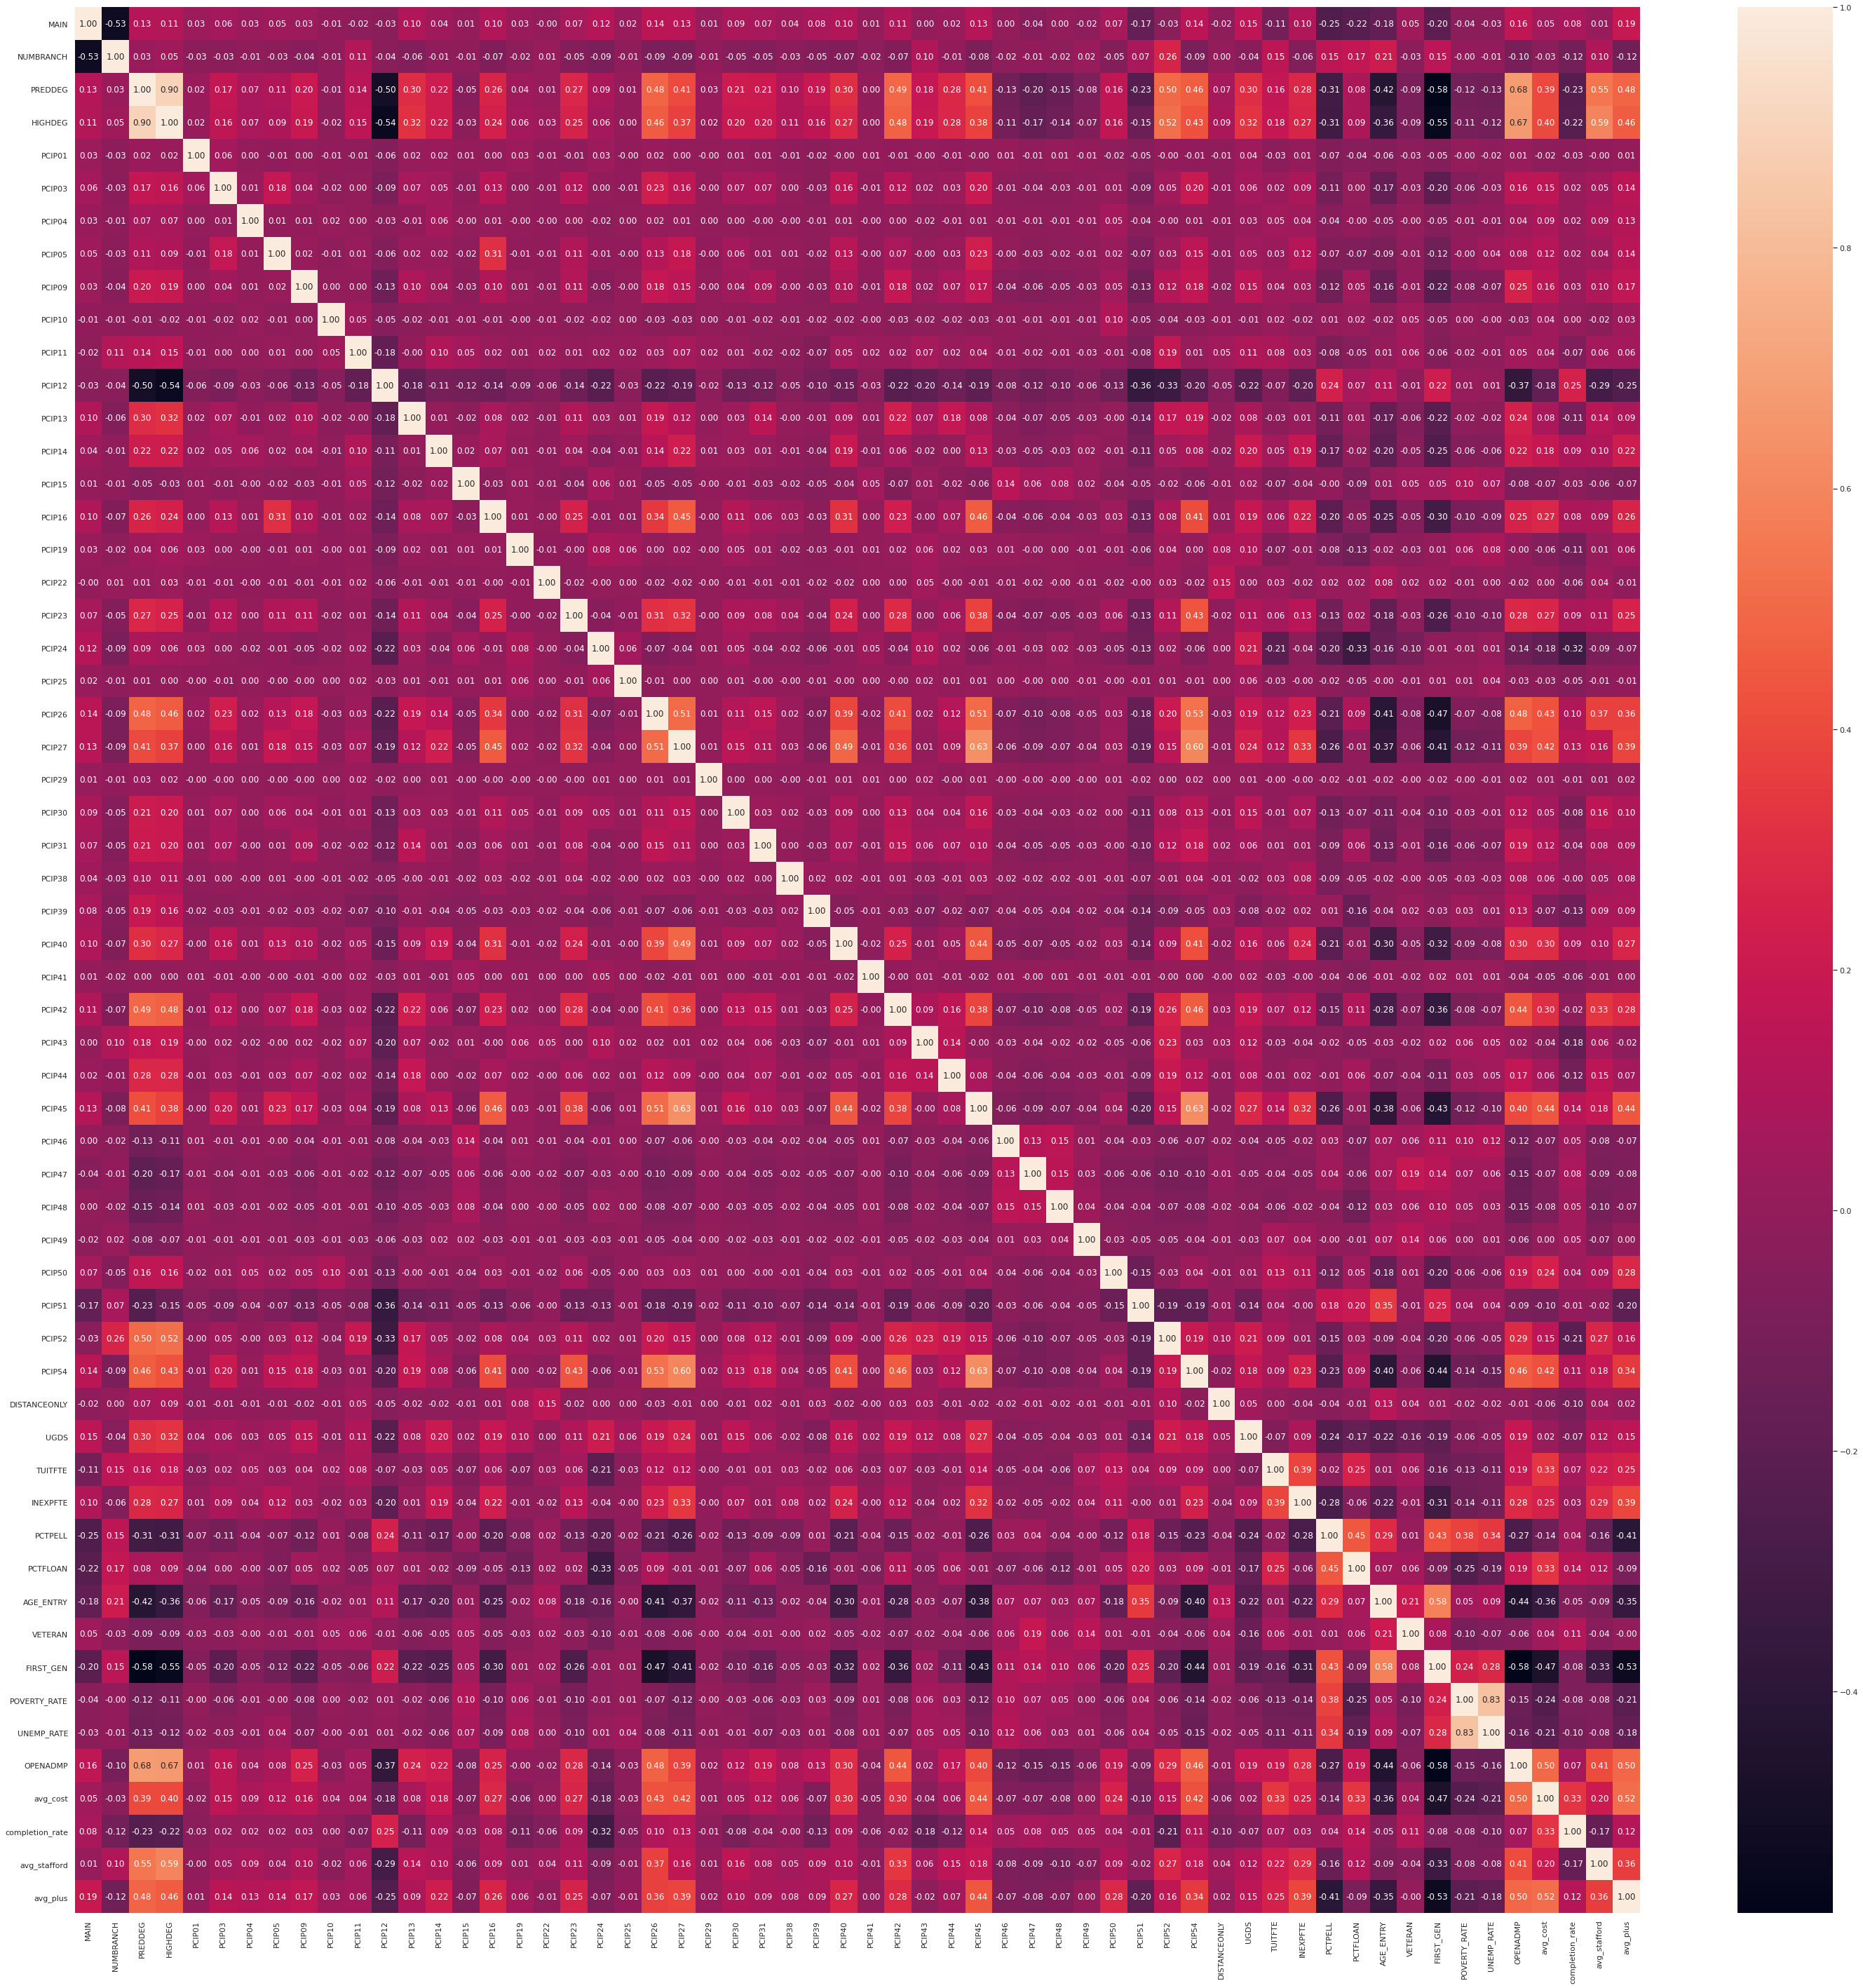

In [12]:
sns.set(rc={'figure.figsize':(50,50)})
sns.heatmap(df.corr(),annot=True, fmt=".2f")

In [13]:
clean_df = pd.get_dummies(df, columns=['PREDDEG', 'HIGHDEG'])


In [14]:
clean_df.head()

MAIN  NUMBRANCH  PCIP01  PCIP03  PCIP04  PCIP05  PCIP09  PCIP10  PCIP11  \
0   1.0        1.0  0.0394  0.0237  0.0039  0.0000  0.0000  0.0394  0.0592   
1   1.0        1.0  0.0000  0.0000  0.0000  0.0016  0.0375  0.0000  0.0139   
2   1.0        1.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
3   1.0        1.0  0.0000  0.0000  0.0000  0.0000  0.0194  0.0000  0.0590   
4   1.0        1.0  0.0000  0.0000  0.0000  0.0000  0.0892  0.0000  0.0585   

   PCIP12  ...      avg_plus  PREDDEG_1.0  PREDDEG_2.0  PREDDEG_3.0  \
0     0.0  ...  21909.162469            0            0            1   
1     0.0  ...  23456.366783            0            0            1   
2     0.0  ...  19351.125000            0            0            1   
3     0.0  ...  21324.095920            0            0            1   
4     0.0  ...  20721.221643            0            0            1   

   PREDDEG_4.0  HIGHDEG_0.0  HIGHDEG_1.0  HIGHDEG_2.0  HIGHDEG_3.0  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   HIGHDEG_4.0  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 65 columns]

In [15]:
from sklearn.model_selection import train_test_split

In [23]:
seed = 123456
X, y = clean_df.drop('completion_rate', axis=1), np.array(clean_df['completion_rate'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=seed)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [25]:
import time

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.030 seconds


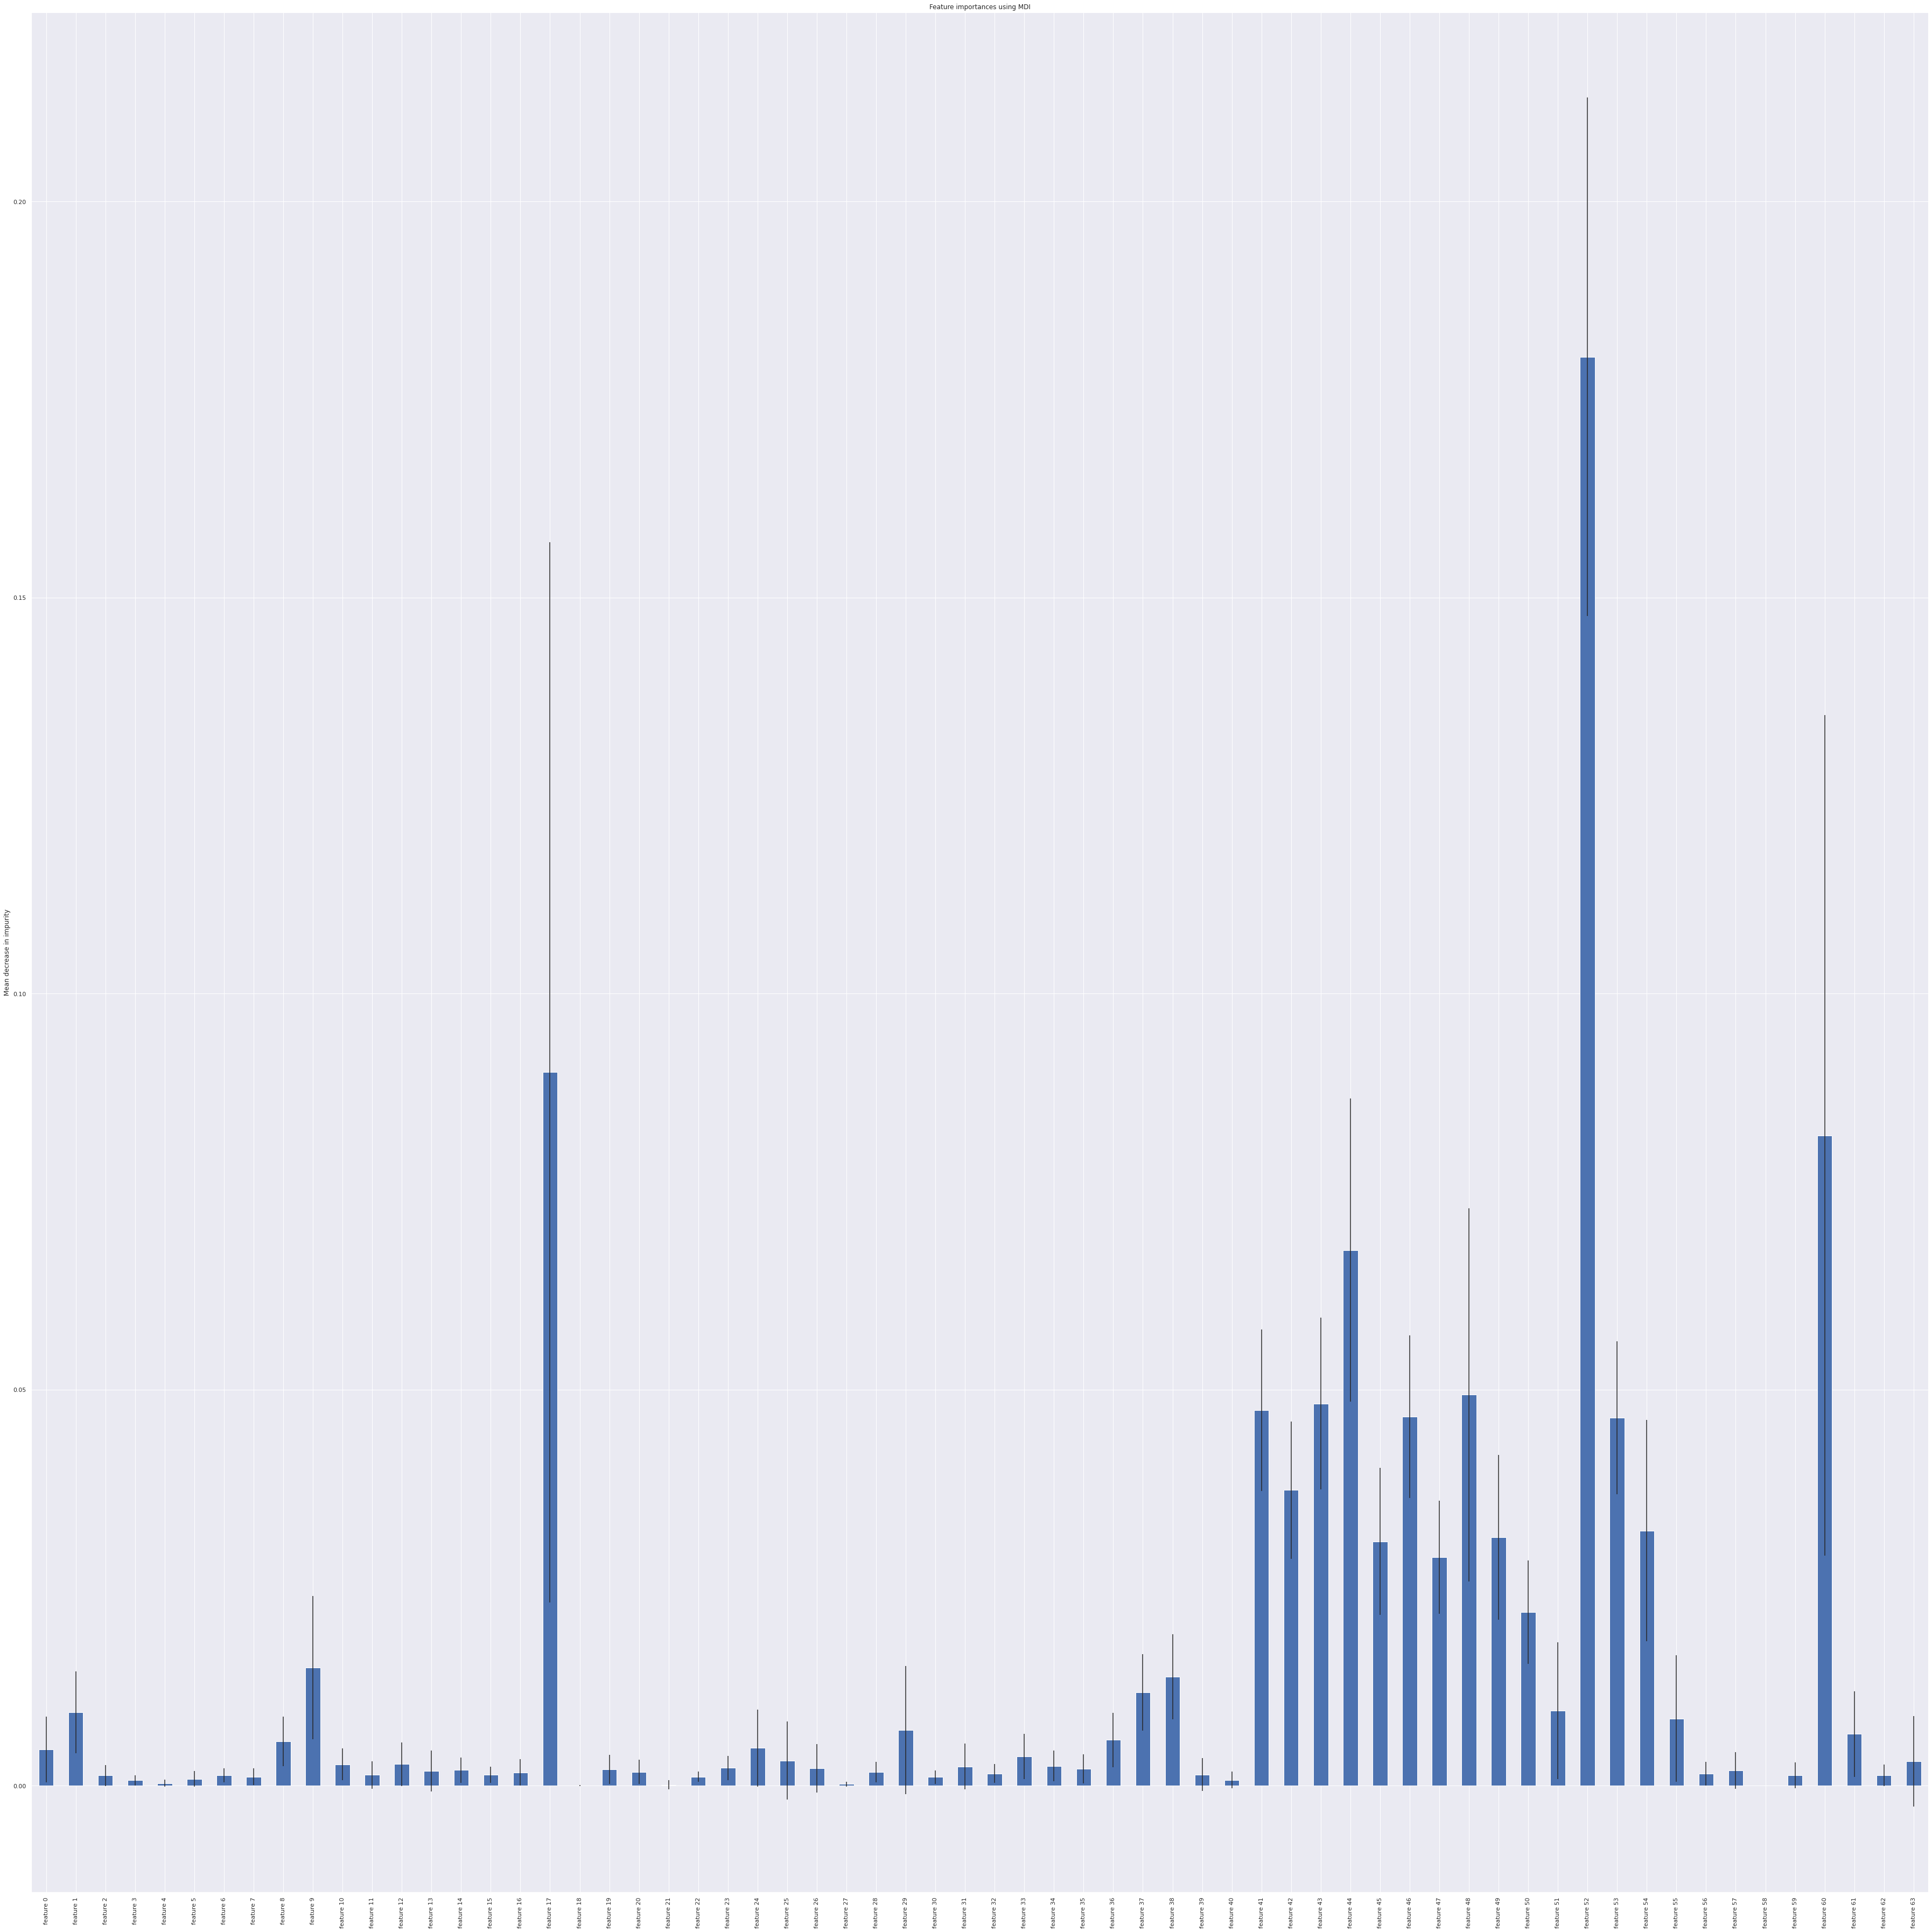

In [26]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [39]:
np.abs(forest.predict(X_test) - y_test)

0.12297633620689653

<AxesSubplot:>

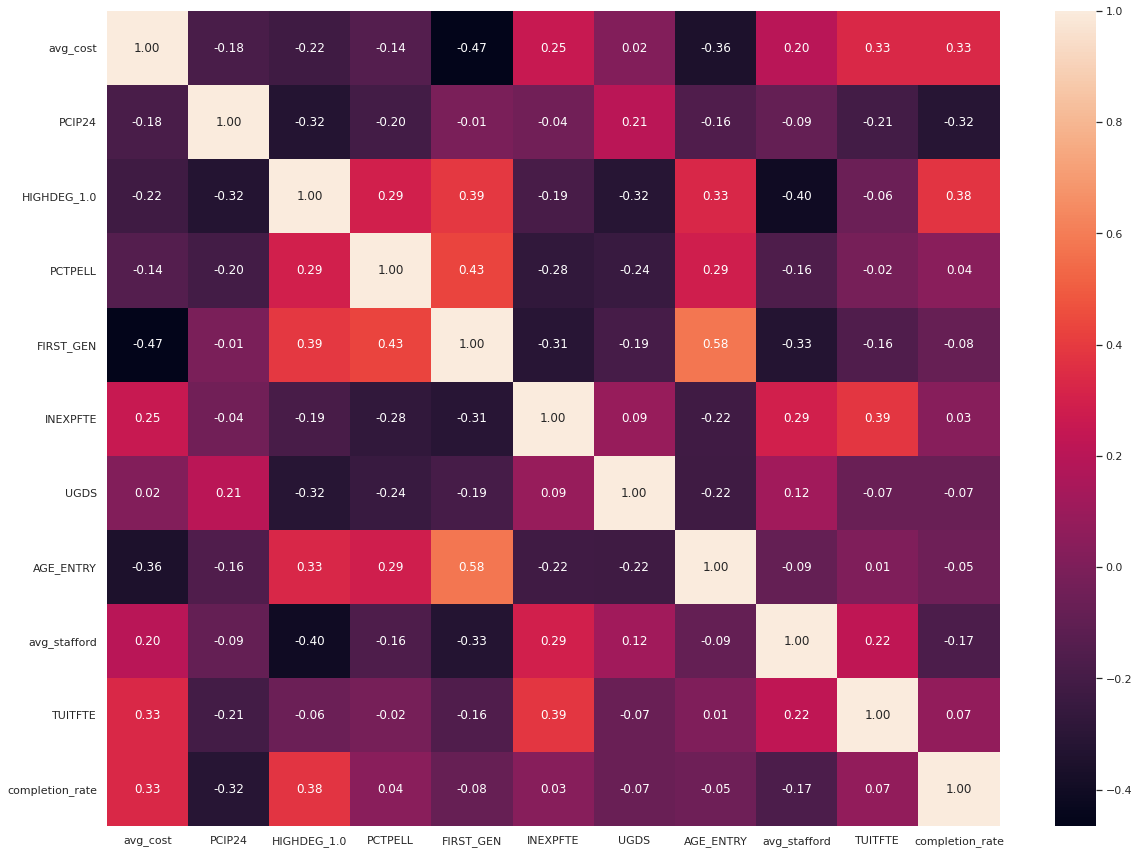

In [68]:
forest_importances = pd.Series(importances, index=X.columns)
cor = clean_df[list(forest_importances.nlargest(10).index) + ['completion_rate']].corr()
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(cor,annot=True, fmt=".2f")

In [ ]:
'avg_cost', 'PCIP24', 'HIGHDEG_1.0', 'PCTPELL', 'FIRST_GEN', 'INEXPFTE', 'UGDS', 'AGE_ENTRY', 'avg_stafford', 'TUITFTE', 'completion_rate'

In [69]:
full_df = get_full_df(merged_file_names, merged_years, data_path, save_cols)

In [70]:
full_df.replace('PrivacySuppressed', np.nan, inplace=True)

In [71]:
st = full_df['STABBR']
full_df = full_df.drop('STABBR', axis=1)
for i in full_df.columns: #to_numeric not working
    try:
        full_df[i] = full_df[i].astype(float)
    except:
        pass
full_df['STABBR'] = st

In [72]:
full_df['avg_cost'] = full_df['COSTT4_A'].replace(np.nan, 0) + full_df['COSTT4_P'].replace(np.nan, 0)
full_df = full_df.drop(['COSTT4_A', 'COSTT4_P'], axis=1)
full_df['completion_rate'] = full_df['C150_4'].replace(np.nan, 0) + full_df['C150_L4'].replace(np.nan, 0)
full_df = full_df.drop(['C150_4', 'C150_L4'], axis=1)

In [73]:
full_df = full_df.loc[full_df['PCIP01'].notna()]

In [74]:
for col in full_df.columns:
    if full_df[col].isna().sum():
        full_df[col] = state_group_avg(full_df, col)

In [75]:
full_df.dropna(inplace=True)

In [76]:
full_df['avg_stafford'] = full_df['LPSTAFFORD_AMT'] / full_df['LPSTAFFORD_CNT']
full_df['avg_plus'] = full_df['LPPPLUS_AMT'] / full_df['LPPPLUS_CNT']
full_df = full_df.drop(['LPSTAFFORD_AMT', 'LPSTAFFORD_CNT', 'LPPPLUS_AMT', 'LPPPLUS_CNT', 'STABBR'], axis=1)

In [77]:
clean_full_df = pd.get_dummies(full_df, columns=['PREDDEG', 'HIGHDEG'])

In [88]:
seed = 123456
X, y = clean_full_df.drop('completion_rate', axis=1), np.array(clean_full_df['completion_rate'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=seed)

In [89]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestRegressor(random_state=seed)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [90]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.182 seconds


In [92]:
1 - np.abs(forest.predict(X_test) - y_test).mean()

0.8790784947556944